In [5]:
from bs4 import BeautifulSoup
import requests
import sqlite3
import pandas as pd

In [6]:
res = requests.get('https://www.itreview.jp/products/windows-10/reviews#review-174780')
soup = BeautifulSoup(res.text, 'html.parser')

div_tag = soup.find('div', id='paginate_top')
dd_tag = div_tag.find_all('dd', class_ = 'product-review-answer')

win_lists = []
for i in dd_tag:
    p_tag = i.find('p')
    if p_tag:
        win_lists.append(p_tag.get_text(separator=" "))

print(win_lists)
print(len(win_lists))


['世間一般で広く使われているOSの一つであり、ユーザマニュアルや個人ブログなど困ったときの解決方法が広く記載されているため、何かあった際に解決しやすい。\n これまでWindowsXPから７とWindowsOSを利用しており、今まで作った資料を実行できるなどの利点がある。\n また、Windowsは市販も広くされており、会社で得た知識、特にセキュリティ面でどのようなことに注意が必要か、それを注意するためにどのような設定が有効かが流用できるため、従業員に対して私用PCでも有効であると啓発できる。', '基幹OSのため、基本的な動作においては満足している。\n ただ、無線キーボードをつないだ際に場合によってファンクションキーが常に有効となる場合がある。古いOSの場合はレジストリを書き換えるなど対処したが、最近はもし壊れたらのリスクが怖く手が出せない。キーボード設定を簡易に変更できるようになってくれるとうれしい。', 'PCを知らない従業員がPCを理解せずにPCを利用できるようになる。昨今ではローコード・ノーコードとさらに理解せずにできるようなっており、日々の業務の自動化、省力化に大幅に貢献している。\n 導入効果において、OSがなければそもそも業務ができないほどの貢献度である。', 'Windowsクライアントとして枯れたOSであり、システムの安定性、 貧弱なCPU・メモリ(4GByte)から多コア大メモリまで幅広いリソースで可動できる点など Windowsクライアント最終形として評価できる。Windows11ではCPUやチップセットの制限が多く稼働できるマシンが限定される。\n PowerAutomate Desktopによる自動化や、 Teamsによるオンラインミーティング、プロジェクト進行など もはやLinuxだけで業務を回せる時代は過ぎ去ったと感じる。\n また、WSL2による Linux各ディストリビューションイメージの稼働可が大きなポイントで、1台で Windows, Linuxコマンド両方を実行できるので、linux shell scriptで簡単な処理をさっと書いて実行できる点が業務効率化として評価できる。', '移行経過中のためコントロールパネルと「Windowsの設定」が分離、どちらつかずの状態なのが残念。\n また PINによるログオンを有効にし

In [75]:
print(win_lists)

['世間一般で広く使われているOSの一つであり、ユーザマニュアルや個人ブログなど困ったときの解決方法が広く記載されているため、何かあった際に解決しやすい。\n これまでWindowsXPから７とWindowsOSを利用しており、今まで作った資料を実行できるなどの利点がある。\n また、Windowsは市販も広くされており、会社で得た知識、特にセキュリティ面でどのようなことに注意が必要か、それを注意するためにどのような設定が有効かが流用できるため、従業員に対して私用PCでも有効であると啓発できる。', '基幹OSのため、基本的な動作においては満足している。\n ただ、無線キーボードをつないだ際に場合によってファンクションキーが常に有効となる場合がある。古いOSの場合はレジストリを書き換えるなど対処したが、最近はもし壊れたらのリスクが怖く手が出せない。キーボード設定を簡易に変更できるようになってくれるとうれしい。', 'PCを知らない従業員がPCを理解せずにPCを利用できるようになる。昨今ではローコード・ノーコードとさらに理解せずにできるようなっており、日々の業務の自動化、省力化に大幅に貢献している。\n 導入効果において、OSがなければそもそも業務ができないほどの貢献度である。', 'Windowsクライアントとして枯れたOSであり、システムの安定性、 貧弱なCPU・メモリ(4GByte)から多コア大メモリまで幅広いリソースで可動できる点など Windowsクライアント最終形として評価できる。Windows11ではCPUやチップセットの制限が多く稼働できるマシンが限定される。\n PowerAutomate Desktopによる自動化や、 Teamsによるオンラインミーティング、プロジェクト進行など もはやLinuxだけで業務を回せる時代は過ぎ去ったと感じる。\n また、WSL2による Linux各ディストリビューションイメージの稼働可が大きなポイントで、1台で Windows, Linuxコマンド両方を実行できるので、linux shell scriptで簡単な処理をさっと書いて実行できる点が業務効率化として評価できる。', '移行経過中のためコントロールパネルと「Windowsの設定」が分離、どちらつかずの状態なのが残念。\n また PINによるログオンを有効にし

In [76]:
db_name = "winre.db"
conn = sqlite3.connect(db_name)

In [77]:
conn

In [78]:
winre_data = pd.DataFrame(win_lists)
print(winre_data)

                                                    0
0   世間一般で広く使われているOSの一つであり、ユーザマニュアルや個人ブログなど困ったときの解決...
1   基幹OSのため、基本的な動作においては満足している。\n ただ、無線キーボードをつないだ際に...
2   PCを知らない従業員がPCを理解せずにPCを利用できるようになる。昨今ではローコード・ノーコ...
3   Windowsクライアントとして枯れたOSであり、システムの安定性、 貧弱なCPU・メモリ(...
4   移行経過中のためコントロールパネルと「Windowsの設定」が分離、どちらつかずの状態なのが...
5   大量のoffice文書をPowerAutomate Desktopで自動処理（上限に該当する...
6   7→10への移行により、慣れもあった中、始めのうちは大変苦労いたしました。\n また、PCに...
7   会社でも個人でも利用していますが、動作が重たく感じることがあります。PCのスペックに依るとこ...
8   どんなエラーでも、大多数の方が使用しているため、解決が必要な場合でも直ぐに検索が出来るところ...
9   長らく利用しています。グループポリシーによって集中管理でほとんどの機能は使えませんが、パフォ...
10  デフォルト設定でインターネットオプションで旧来のSSL通信は選べないようするとか、TLS1....
11  集中管理や細かいポリシー設定など、ブラウザ利用時の稼働性など改善されていて安定していると感じ...
12  Windows10になり、UI変更もこなれてきて使いやすい形に落ち着いた。\n レガシーなと...
13  マイコンピュータなど、機能で名称が変わったものは以前の名前でも検索・呼び出し可能なままにして...
14  やはり利用ユーザー数が多いOSなので、ビジネス上のファイルのやり取りで、ファイル形式の相違な...
15  Windows11の1世代前のバージョンであるが基本的な機能を備えており、Windowsに馴...
16  更新プログラムのインストールが必要であり、複数回発生し再起動が必要になります。それらの手間が...
17  Windows10は最新に近いバージョンでありな

In [79]:
winre_data.to_sql("winre_class", conn, if_exists="replace")


30

In [80]:
c = conn.cursor()
query = 'SELECT * FROM winre_class'
c.execute (query)

In [81]:
for row in c.execute(query):
  print(row)

(0, '世間一般で広く使われているOSの一つであり、ユーザマニュアルや個人ブログなど困ったときの解決方法が広く記載されているため、何かあった際に解決しやすい。\n これまでWindowsXPから７とWindowsOSを利用しており、今まで作った資料を実行できるなどの利点がある。\n また、Windowsは市販も広くされており、会社で得た知識、特にセキュリティ面でどのようなことに注意が必要か、それを注意するためにどのような設定が有効かが流用できるため、従業員に対して私用PCでも有効であると啓発できる。')
(1, '基幹OSのため、基本的な動作においては満足している。\n ただ、無線キーボードをつないだ際に場合によってファンクションキーが常に有効となる場合がある。古いOSの場合はレジストリを書き換えるなど対処したが、最近はもし壊れたらのリスクが怖く手が出せない。キーボード設定を簡易に変更できるようになってくれるとうれしい。')
(2, 'PCを知らない従業員がPCを理解せずにPCを利用できるようになる。昨今ではローコード・ノーコードとさらに理解せずにできるようなっており、日々の業務の自動化、省力化に大幅に貢献している。\n 導入効果において、OSがなければそもそも業務ができないほどの貢献度である。')
(3, 'Windowsクライアントとして枯れたOSであり、システムの安定性、 貧弱なCPU・メモリ(4GByte)から多コア大メモリまで幅広いリソースで可動できる点など Windowsクライアント最終形として評価できる。Windows11ではCPUやチップセットの制限が多く稼働できるマシンが限定される。\n PowerAutomate Desktopによる自動化や、 Teamsによるオンラインミーティング、プロジェクト進行など もはやLinuxだけで業務を回せる時代は過ぎ去ったと感じる。\n また、WSL2による Linux各ディストリビューションイメージの稼働可が大きなポイントで、1台で Windows, Linuxコマンド両方を実行できるので、linux shell scriptで簡単な処理をさっと書いて実行できる点が業務効率化として評価できる。')
(4, '移行経過中のためコントロールパネルと「Windowsの設定」が分離、どちらつかずの状態なのが残念。\n

In [7]:
import glob
import re
import unicodedata
import pandas as pd

def to_full_width(match):
    return unicodedata.normalize('NFKC', match.group())

text_paths = glob.glob('/Users/tanakatooryu/dsp2final/tanakatorudsp/winre.db')
texts = []

for text_path in text_paths:
    
    with open(text_path, 'r', encoding='utf-8', errors='ignore') as file:
        content = file.read()
        

    
    text = open(text_path, 'r', encoding='utf-8', errors='ignore').read()
    text = re.sub(" ", "", text)
    text = re.sub(r'[a-zA-Z]', '', text)
    text = re.sub(r'[｡-ﾟ]', to_full_width, text)
    text = re.sub(r'\(.*?\)|「」|\.', '', text)  
    text = re.sub("　", "", text)
    text = re.sub("\x00","",text)
    text = re.sub("する","",text)

    texts.append(text)

news_ss = pd.Series(texts)
display(news_ss.head(100))

0    3@_
\n665#____"___""_"]#...
dtype: object

In [8]:
import MeCab
tagger = MeCab.Tagger("-Ochasen")
import mojimoji
import os
import urllib

def load_jp_stopwords(path="jp_stop_words.txt"):
    url = 'http://svn.sourceforge.jp/svnroot/slothlib/CSharp/Version1/SlothLib/NLP/Filter/StopWord/word/Japanese.txt'
    if os.path.exists(path):
        print('File already exists.')
    else:
        print('Downloading...')
        urllib.request.urlretrieve(url, path)
    return pd.read_csv(path, header=None)[0].tolist()

def preprocess_jp(series):
    stop_words = load_jp_stopwords()
    def tokenizer_func(text):
        tokens = []
        node = tagger.parseToNode(str(text))
        while node:
            features = node.feature.split(',')
            surface = features[6]
            if (surface == '*') or (len(surface) < 2) or (surface in stop_words):
                node = node.next
                continue
            noun_flag = (features[0] == '名詞')
            proper_noun_flag = (features[0] == '名詞') & (features[1] == '固有名詞')
            verb_flag = (features[0] == '動詞') & (features[1] == '自立')
            adjective_flag = (features[0] == '形容詞') & (features[1] == '自立')
            if proper_noun_flag:
                tokens.append(surface)
            elif noun_flag:
                tokens.append(surface)
            elif verb_flag:
                tokens.append(surface)
            elif adjective_flag:
                tokens.append(surface)
            node = node.next
        return " ".join(tokens)

    series = series.map(tokenizer_func)
    
    #---------------Normalization-----------#
    series = series.map(lambda x: x.lower())
    series = series.map(mojimoji.zen_to_han)

    return series
    
processed_news_ss = preprocess_jp(news_ss)
display(processed_news_ss.head()) 

File already exists.


0    移行 慣れる 始め 大変 苦労 慣れる 社員 多い 従業員 状態 戻す 言う 使う 便利 多...
dtype: object

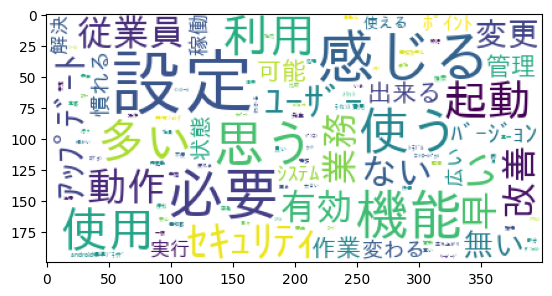

In [9]:
from wordcloud import WordCloud
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

font_path="/Library/Fonts/ipaexg.ttf"
font_property = matplotlib.font_manager.FontProperties(fname=font_path, size=24)

def show_wordcloud(series):
    long_string = ','.join(list(series.values))
    
    # Create a WordCloud object
    wordcloud = WordCloud(font_path=font_path, background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')
    
    # Generate a word cloud
    wordcloud.generate(long_string)
    
    # Visualize the word cloud
    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(processed_news_ss) 

In [96]:
conn.close

<function Connection.close>